# Exemplo muito simples de clustering

 [Este link](http://scikit-learn.org/0.18/auto_examples/cluster/plot_cluster_comparison.html) tem mais informações sobre algoritmos de clustering.

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

np.random.seed(42)




In [2]:
data = pd.read_csv("clusters.csv", index_col=0)

In [3]:
data.head()

,x,y,z,idx,type
0.0,1.334960,1.622924,0.887187,0.0,1.0
1.0,0.703013,0.909143,1.580094,1.0,1.0
2.0,1.034351,1.075001,1.043845,2.0,1.0
3.0,0.940395,1.035246,1.065290,3.0,1.0
4.0,0.664142,1.207606,1.259187,4.0,1.0


## Visualizando os dados de entrada

<IPython.core.display.Javascript object>


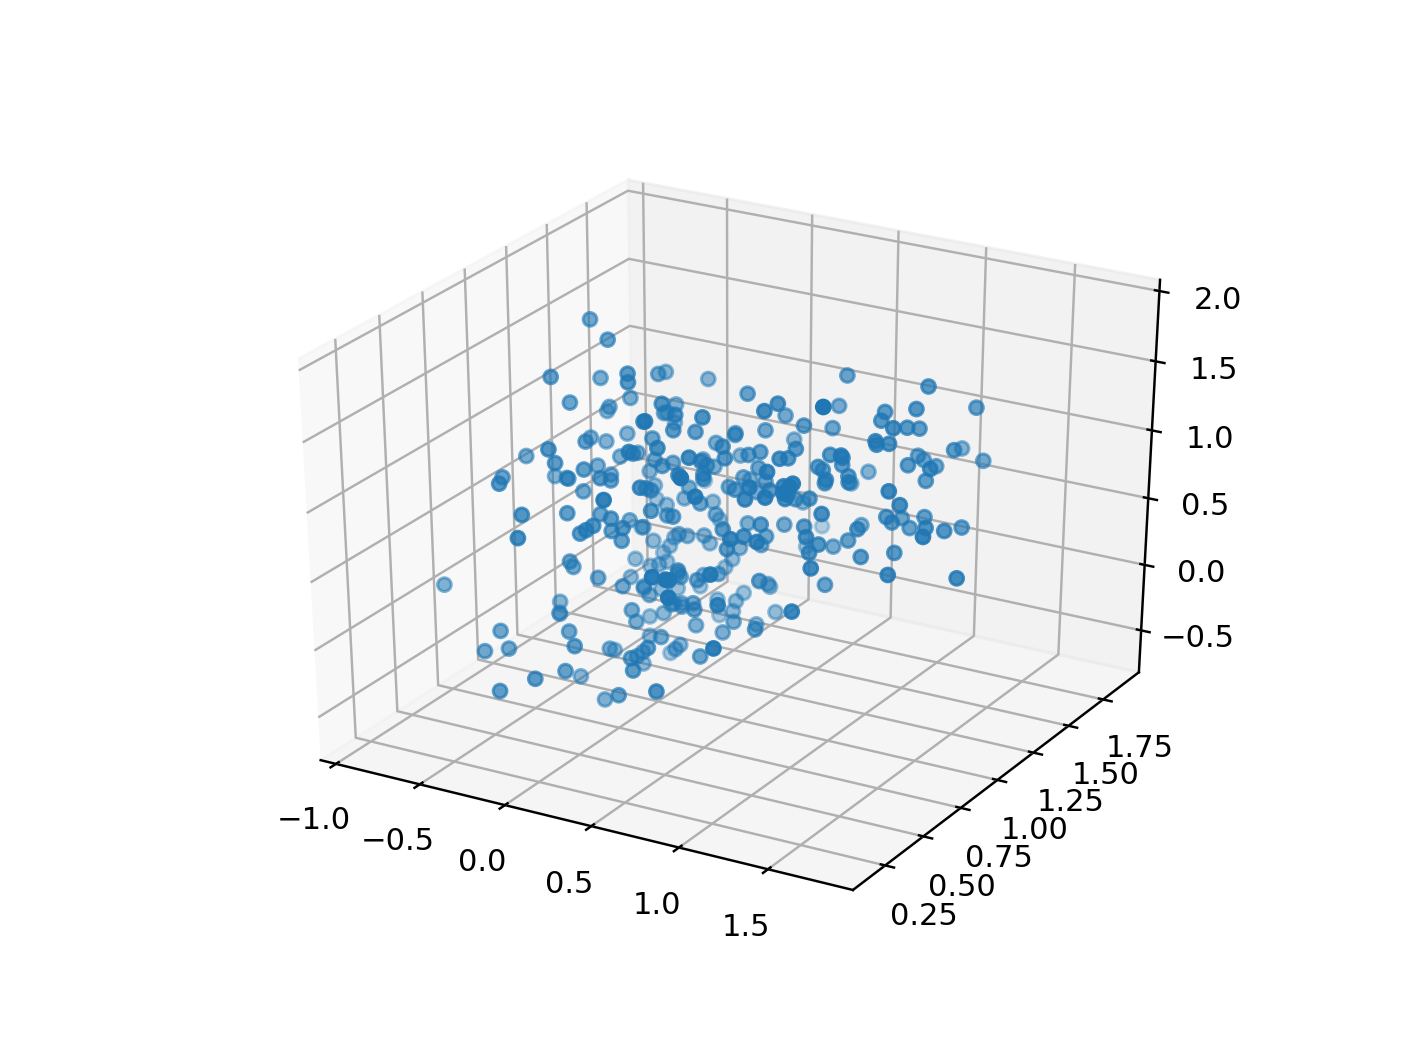

In [4]:
plt3d = plt.figure().gca(projection="3d")
plt3d.scatter(data.x, data.y, data.z)

## Preparando os dados

Note que a columa `idx` não será usada, apenas repete o índice. E também que a coluna `type`  já tem a categoria pré-classificada. Não vamos usá-la agora porque não é comum sabermos o tipo `a priori` em algoritmos de clusterização.

In [5]:
dados_entrada = data.loc[:,("x", "y", "z")]

## Usando o clustering

In [6]:
three_means = cluster.MiniBatchKMeans(n_clusters=3)

Treinando o clusterizador Veja [este exemplo](http://scikit-learn.org/0.18/auto_examples/cluster/plot_cluster_comparison.html) para mais algoritmos de clustering.

Neste caso já **sabíamos** que seriam 3 clusters. Na prática é comum tentar algumas opções até encontrar uma mais adequada

In [7]:
three_means.fit(dados_entrada)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [8]:
saida = three_means.predict(dados_entrada)

In [9]:
saida

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], d

Dados conjuntos

In [10]:
conjunto = dados_entrada.copy()

In [11]:
conjunto["saida"] = saida

Agora temos um dataframe com entradas **e** saídas

In [12]:
conjunto.head()

,x,y,z,saida
0.0,1.334960,1.622924,0.887187,2
1.0,0.703013,0.909143,1.580094,2
2.0,1.034351,1.075001,1.043845,2
3.0,0.940395,1.035246,1.065290,2
4.0,0.664142,1.207606,1.259187,2


<IPython.core.display.Javascript object>


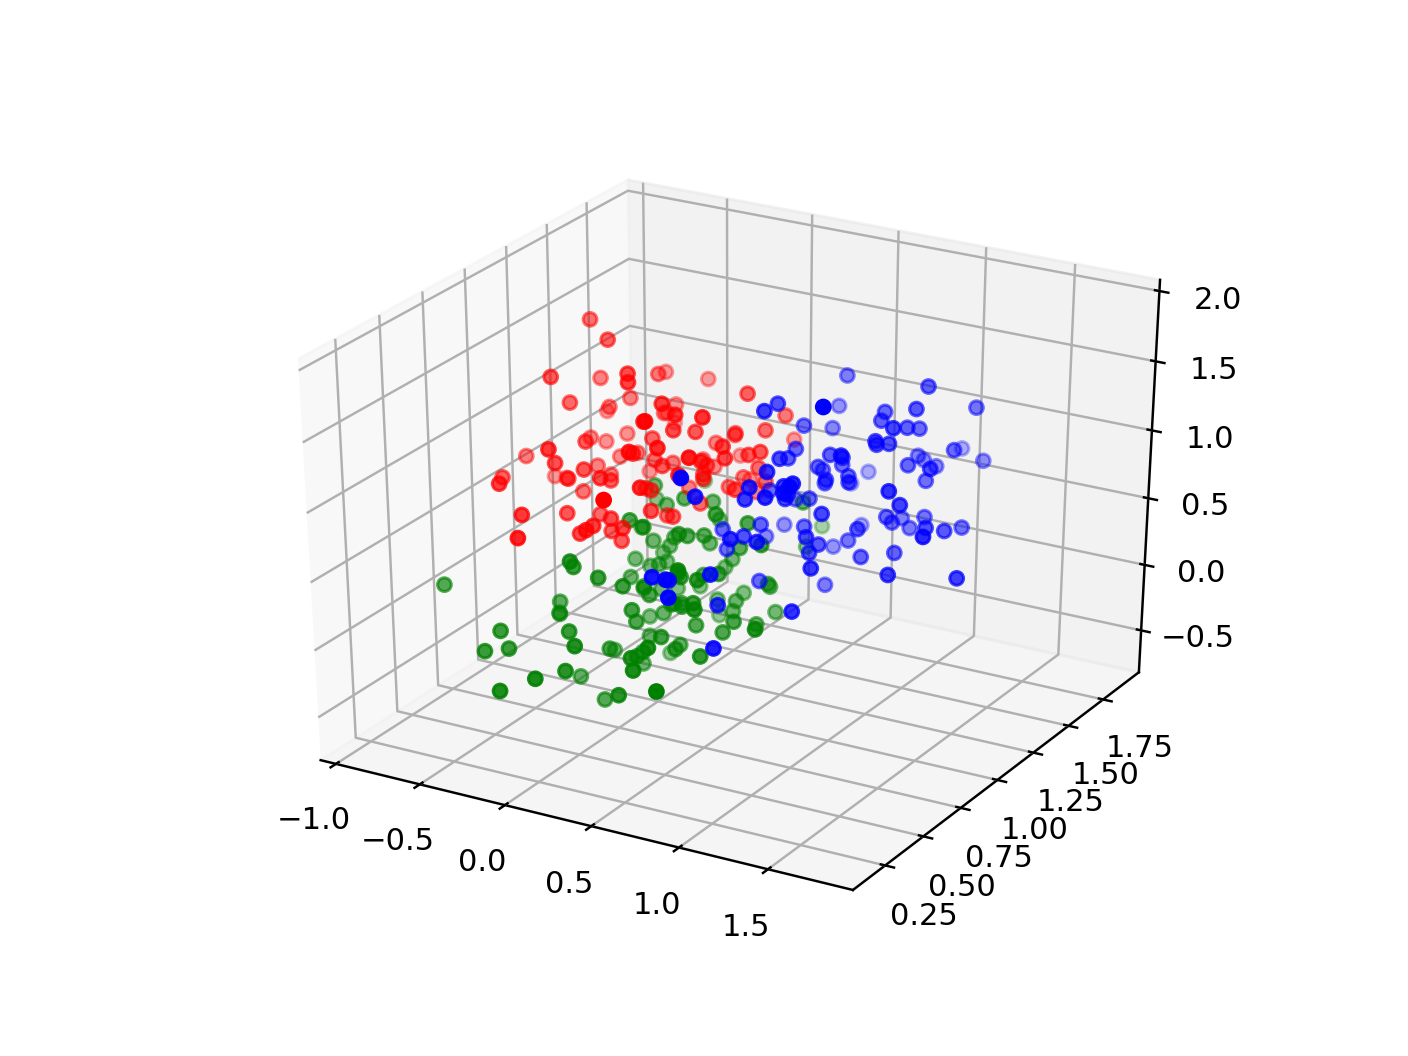

In [13]:
plt3d = plt.figure().gca(projection="3d")
grupo0 = conjunto[conjunto.saida==0]
grupo1 = conjunto[conjunto.saida==1]
grupo2 = conjunto[conjunto.saida==2]

plt3d.scatter(grupo0.x, grupo0.y, grupo0.z, color="r")
plt3d.scatter(grupo1.x, grupo1.y, grupo1.z, color="g")
plt3d.scatter(grupo2.x, grupo2.y, grupo2.z, color="b")
